In [ ]:
import pandas as pd

# Dosya yolu
csv_file_path = "Akbank Data.csv"

# Temizleme işlemi
df = pd.read_csv(csv_file_path, sep=';', skiprows=6)

# Sütun adlarını temizle (gereksiz boşluklar veya son noktalı virgül)
df.columns = [col.strip().strip(';') for col in df.columns]

# Tamamen boş satırları çıkar
df.dropna(how='all', inplace=True)

# Gerekirse Tutar ve Bakiye sütunlarını sayıya çevir
for col in ['Tutar', 'Bakiye']:
    df[col] = df[col].str.replace('.', '', regex=False)  # Binlik ayırıcıyı çıkar
    df[col] = df[col].str.replace(',', '.', regex=False)  # Virgülü noktaya çevir
    df[col] = df[col].str.replace(' TL', '', regex=False)  # TL ifadesini kaldır
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Temiz veri setini görüntüle
print(df)
df.to_csv("cleanedakbank.csv", index=False)


                                                 Tarih     Tutar    Bakiye  \
0                           2025-04-25-13.40.35.888818   -321.00   9438.98   
1                           2025-04-25-00.17.52.759167     -0.30   9759.98   
2                           2025-04-25-00.17.52.757336     -6.09   9760.28   
3                           2025-04-25-00.17.52.753062   -280.00   9766.37   
4                           2025-04-24-16.43.09.142317  10000.00  10046.37   
..                                                 ...       ...       ...   
633                         2024-12-25-00.38.50.926197    -20.00   4803.31   
635                                      Akbank T.A.Ş.       NaN       NaN   
636  Genel Müdürlük: Sabancı Center 4. Levent 34330...       NaN       NaN   
637                     MERSİS No: 0015 0015 2640 0497       NaN       NaN   
638                                     www.akbank.com       NaN       NaN   

                                     Açıklama  Unnamed: 4  
0  

  Data cleaning for akbank.
  

In [ ]:
import pandas as pd

# 1. CSV dosyasını oku
df = pd.read_csv("istanbulweather.csv")

# 2. Gereksiz sütunları belirle ve sil
columns_to_drop = [
    'name', 'description', 'conditions', 'stations', 'sunrise', 'sunset' ,'precip', 'precipprob', 'moonphase' , 'severerisk' ,
'uvindex','solarenergy','solarradiation','cloudcover']
df = df.drop(columns=columns_to_drop, errors='ignore')  # hata vermesin diye errors='ignore'

# 3. datetime sütununu tarih formatına çevir
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')  # bozuk tarih varsa NaT olur

# 4. Eksik verileri (NaN) sil
df = df.dropna()

# 5. datetime sütununu indeks olarak ayarla
df.set_index('datetime', inplace=True)

# 6. Sonuçları göster
print(df.head())
df.to_csv("cleanedweather.csv", index=False)


            tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
datetime                                                                    
2024-12-25     14.4     10.7  12.2          14.4          10.7       12.2   
2024-12-26     12.8      9.5  11.0          12.8           5.8       10.0   
2024-12-27      8.8      4.5   6.5           4.9           1.0        2.8   
2024-12-28      8.5      5.2   6.9           4.8           2.3        3.3   
2024-12-29      8.1      6.9   7.5           4.7           3.1        3.9   

            dew  humidity  precipcover preciptype  snow  snowdepth  windgust  \
datetime                                                                       
2024-12-25  9.8      85.6         8.33       rain   0.0        0.0      28.1   
2024-12-26  9.4      89.9        12.50       rain   0.0        0.0      57.6   
2024-12-27  4.8      88.9        16.67       rain   0.0        0.0      59.4   
2024-12-28  5.0      87.6        16.67       rain   0.0     

data cleaning for weather


First few rows of the dataset:
   tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  dew  \
0     14.4     10.7  12.2          14.4          10.7       12.2  9.8   
1     12.8      9.5  11.0          12.8           5.8       10.0  9.4   
2      8.8      4.5   6.5           4.9           1.0        2.8  4.8   
3      8.5      5.2   6.9           4.8           2.3        3.3  5.0   
4      8.1      6.9   7.5           4.7           3.1        3.9  5.5   

   humidity  precipcover preciptype  snow  snowdepth  windgust  windspeed  \
0      85.6         8.33       rain   0.0        0.0      28.1       19.8   
1      89.9        12.50       rain   0.0        0.0      57.6       33.7   
2      88.9        16.67       rain   0.0        0.0      59.4       35.5   
3      87.6        16.67       rain   0.0        0.0      54.0       32.0   
4      87.0        16.67       rain   0.0        0.0      51.5       30.1   

   winddir  sealevelpressure  visibility  icon  
0     31.2        

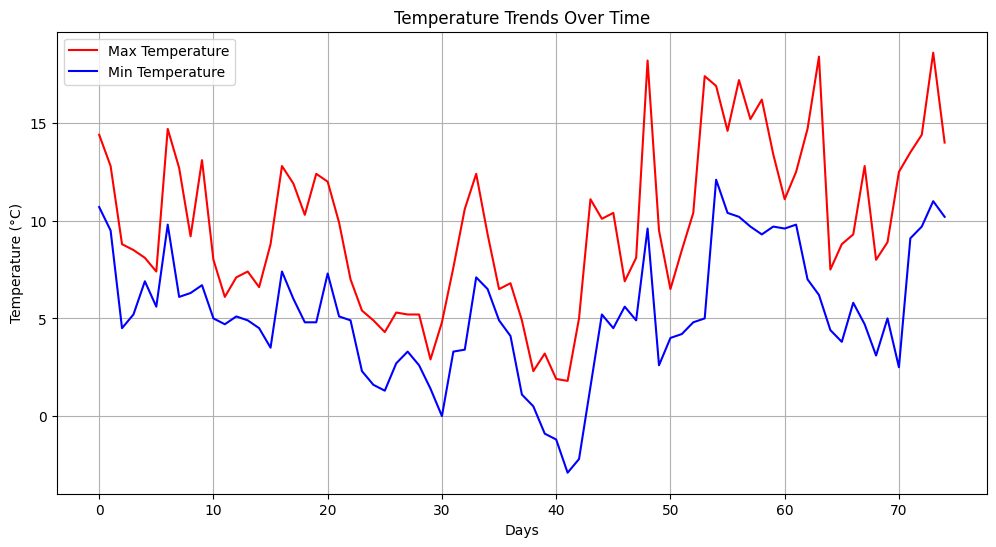

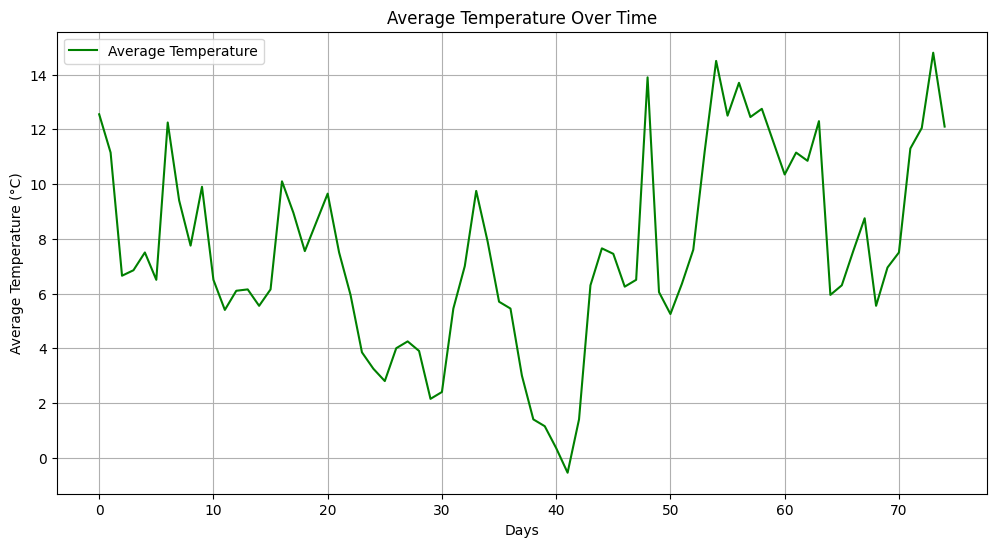

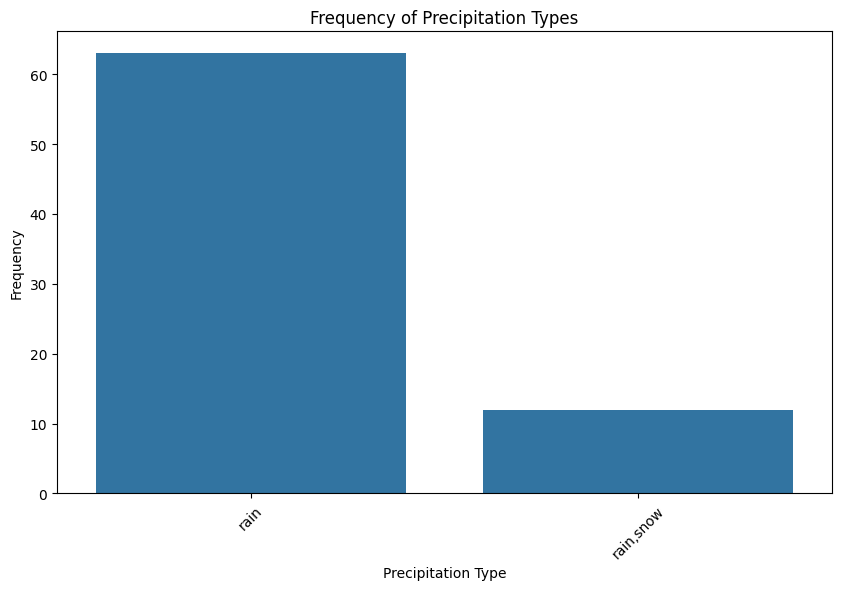

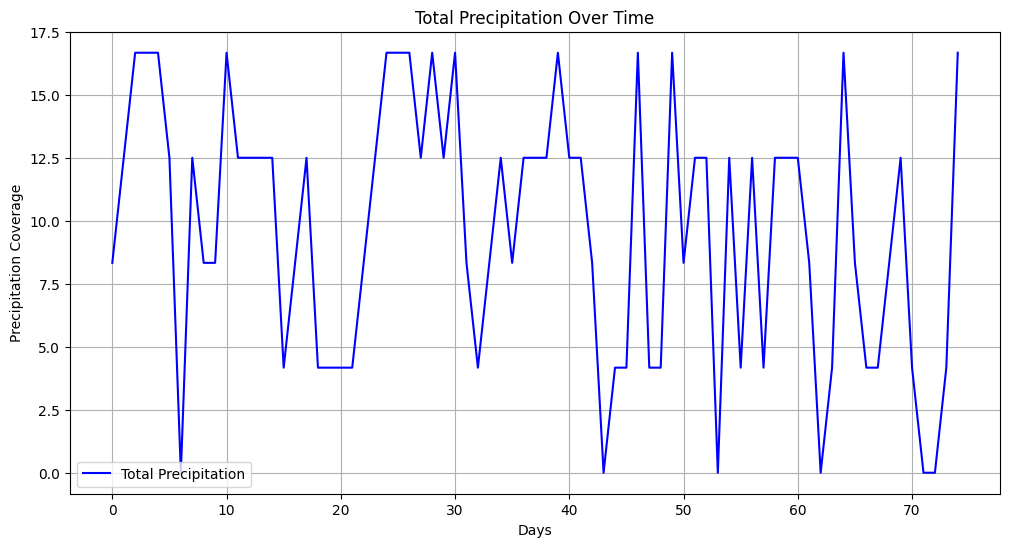

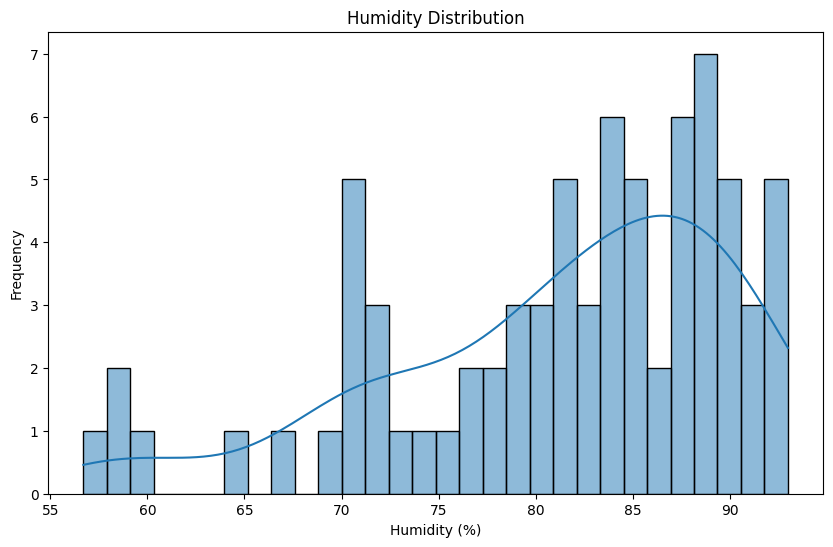

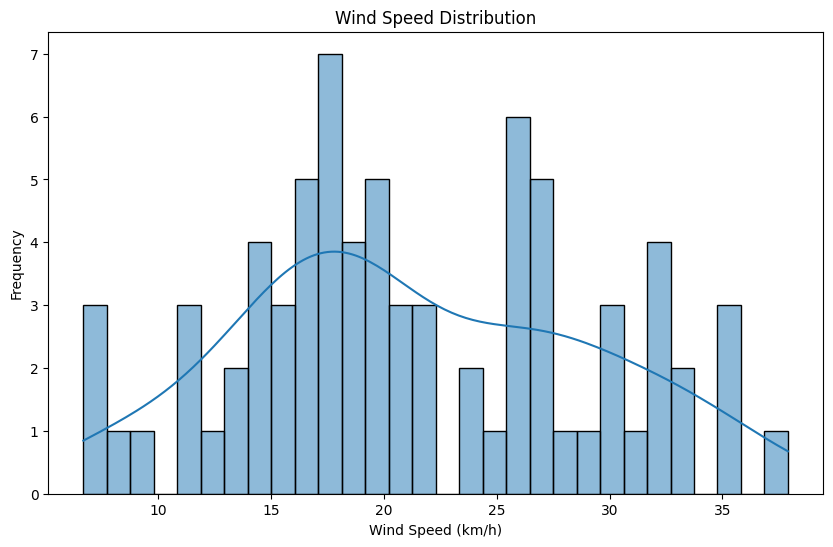

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather data
weather_data = pd.read_csv('cleanedweather.csv')

# 1. Basic Data Overview
print("First few rows of the dataset:")
print(weather_data.head())
print("\nData Types and Missing Values:")
print(weather_data.info())

# 2. Summary Statistics
print("\nSummary Statistics:")
print(weather_data.describe())

# 3. Temperature Trends
plt.figure(figsize=(12, 6))
plt.plot(weather_data['tempmax'], label='Max Temperature', color='red')
plt.plot(weather_data['tempmin'], label='Min Temperature', color='blue')
plt.title('Temperature Trends Over Time')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot average temperature
weather_data['avg_temp'] = (weather_data['tempmax'] + weather_data['tempmin']) / 2
plt.figure(figsize=(12, 6))
plt.plot(weather_data['avg_temp'], label='Average Temperature', color='green')
plt.title('Average Temperature Over Time')
plt.xlabel('Days')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# 4. Precipitation Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=weather_data, x='preciptype')
plt.title('Frequency of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Total precipitation over time
weather_data['precipcover'] = weather_data['precipcover'].fillna(0)  # Fill NaN values with 0
plt.figure(figsize=(12, 6))
plt.plot(weather_data['precipcover'], label='Total Precipitation', color='blue')
plt.title('Total Precipitation Over Time')
plt.xlabel('Days')
plt.ylabel('Precipitation Coverage')
plt.legend()
plt.grid()
plt.show()

# 5. Humidity Analysis
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# 6. Wind Speed Analysis
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['windspeed'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

Hava Durumu Verisi:


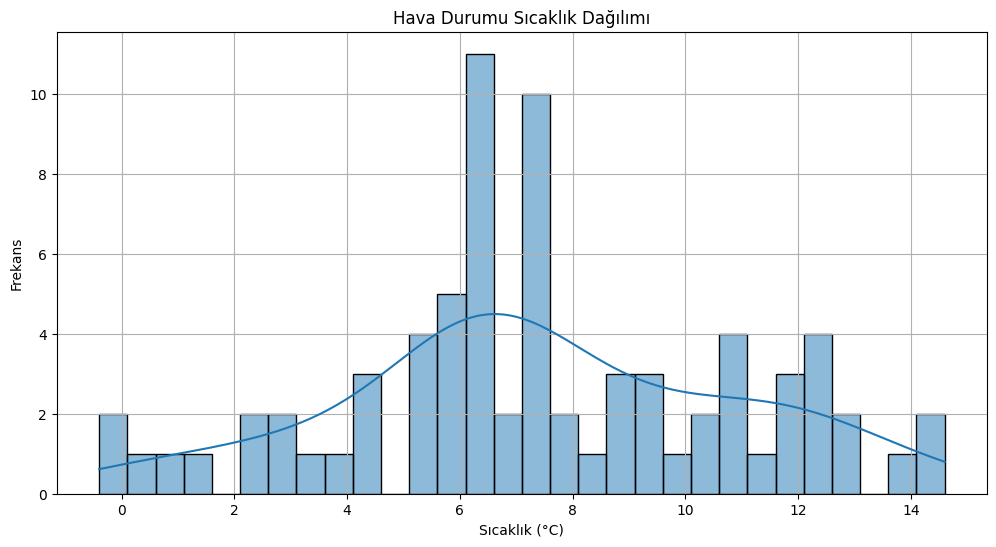

In [ ]:
# Gerekli kütüphaneleri import et
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hava durumu verisini yükle
weather_data = pd.read_csv('cleanedweather.csv')

# Hava durumu verisinin ilk birkaç satırını görüntüle
print("Hava Durumu Verisi:")


# Sıcaklık dağılımını görselleştir
plt.figure(figsize=(12, 6))
sns.histplot(weather_data['temp'], bins=30, kde=True)
plt.title('Hava Durumu Sıcaklık Dağılımı')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

I plotted a bar plot for temperature frequencies. Below, there will be a normality test for the aforementioned data.

In [ ]:
# prompt: normality test for the graph above.

import pandas as pd
from scipy import stats

# Hava durumu verisini yükle
weather_data = pd.read_csv('cleanedweather.csv')


# D’Agostino’nun K-kare testi
k2, p = stats.normaltest(weather_data['temp'])
print("\n Chi-square Test:")
print(f"Test Stat: {k2}")
print(f"p-value: {p}")

# p-değeri yorumu
if p > alpha:
    print("The temperature data falls into a normal distribution.")
else:
    print("The temperature data doees not fall into a normal distribution.")


 Chi-square Test:
Test Stat: 0.3376667619701394
p-value: 0.8446496263508518
The temperature data falls into a normal distribution.


There is a chi square normality test above. According to the test, the data falls into a normal distribution.

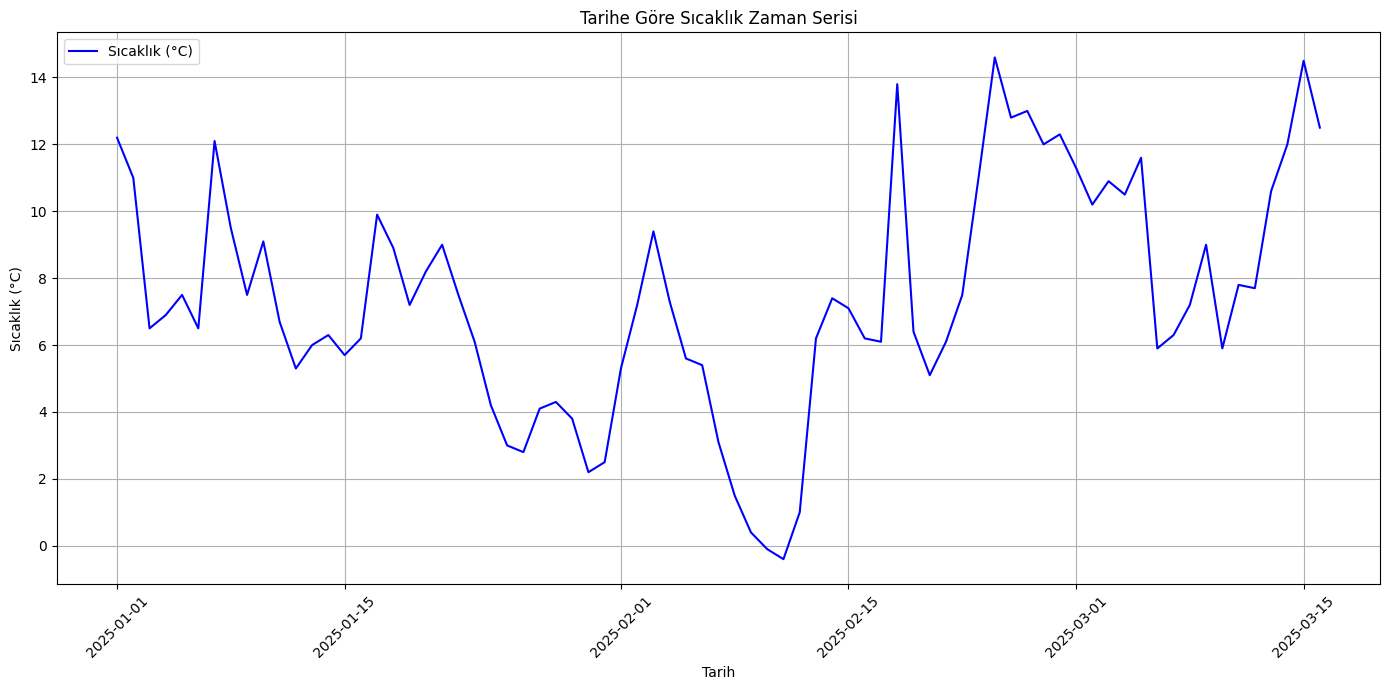

In [ ]:
# Gerekli kütüphaneleri import et
import pandas as pd
import matplotlib.pyplot as plt

# Hava durumu verisini yükle
weather_data = pd.read_csv('cleanedweather.csv')

# Tarih sütununu oluştur
# Eğer tarih bilgisi yoksa, tarihleri oluşturmak için bir aralık belirleyin
weather_data['date'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')

# Tarih sütununu indeks olarak ayarla
weather_data.set_index('date', inplace=True)

# Zaman serisi grafiğini oluştur
plt.figure(figsize=(14, 7))
plt.plot(weather_data['temp'], label='Sıcaklık (°C)', color='blue')
plt.title('Tarihe Göre Sıcaklık Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Sıcaklık (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

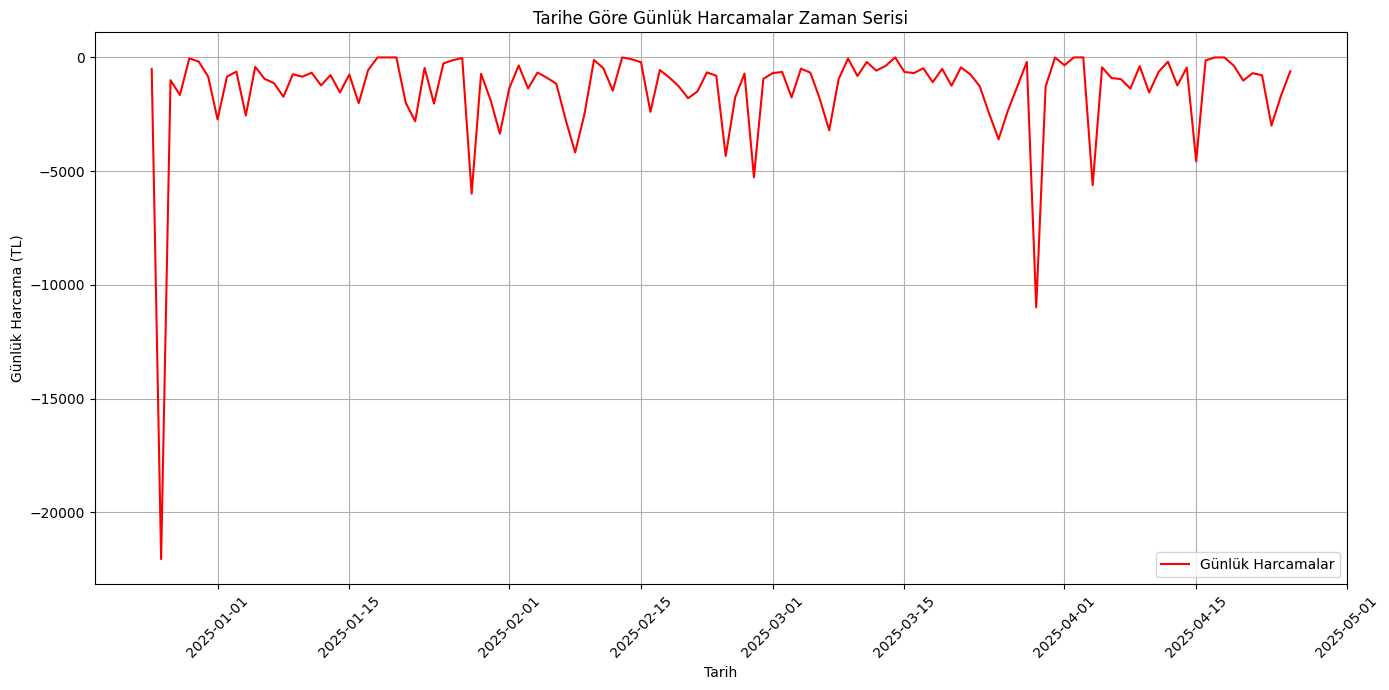

In [ ]:
# Gerekli kütüphaneleri import et
import pandas as pd
import matplotlib.pyplot as plt

# Akbank verisini yükle
akbank_data = pd.read_csv('cleanedakbank.csv')

# Tarih sütununu kontrol et ve geçerli tarih formatına sahip olmayan satırları temizle
akbank_data = akbank_data[akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')]

# Tarih sütununu datetime formatına çevir
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')

# Harcamaları negatif tutar olarak filtrele
akbank_data['Günlük Harcamalar'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Tarih sütununu indeks olarak ayarla
akbank_data.set_index('Tarih', inplace=True)

# Günlük harcamaları toplamak için gruplama yap
daily_expenses = akbank_data.resample('D')['Günlük Harcamalar'].sum()

# Zaman serisi grafiğini oluştur
plt.figure(figsize=(14, 7))
plt.plot(daily_expenses.index, daily_expenses, label='Günlük Harcamalar', color='red')
plt.title('Tarihe Göre Günlük Harcamalar Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Günlük Harcama (TL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

I have plotted two time seres. First one is the date vs temperature and the other one is date vs my spending amounts daily. I will use this information later on when I combine spendings with the temperature data and find out whether there is a correlation between them. I left the outliers by choice since I think they represent my spending characteristic.

Weather Data:
   tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  dew  \
0     14.4     10.7  12.2          14.4          10.7       12.2  9.8   
1     12.8      9.5  11.0          12.8           5.8       10.0  9.4   
2      8.8      4.5   6.5           4.9           1.0        2.8  4.8   
3      8.5      5.2   6.9           4.8           2.3        3.3  5.0   
4      8.1      6.9   7.5           4.7           3.1        3.9  5.5   

   humidity  precipcover preciptype  snow  snowdepth  windgust  windspeed  \
0      85.6         8.33       rain   0.0        0.0      28.1       19.8   
1      89.9        12.50       rain   0.0        0.0      57.6       33.7   
2      88.9        16.67       rain   0.0        0.0      59.4       35.5   
3      87.6        16.67       rain   0.0        0.0      54.0       32.0   
4      87.0        16.67       rain   0.0        0.0      51.5       30.1   

   winddir  sealevelpressure  visibility  icon  
0     31.2            1009.8       

<ipython-input-22-086fbe403caf>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icon_counts.index, y=icon_counts.values, palette='viridis')


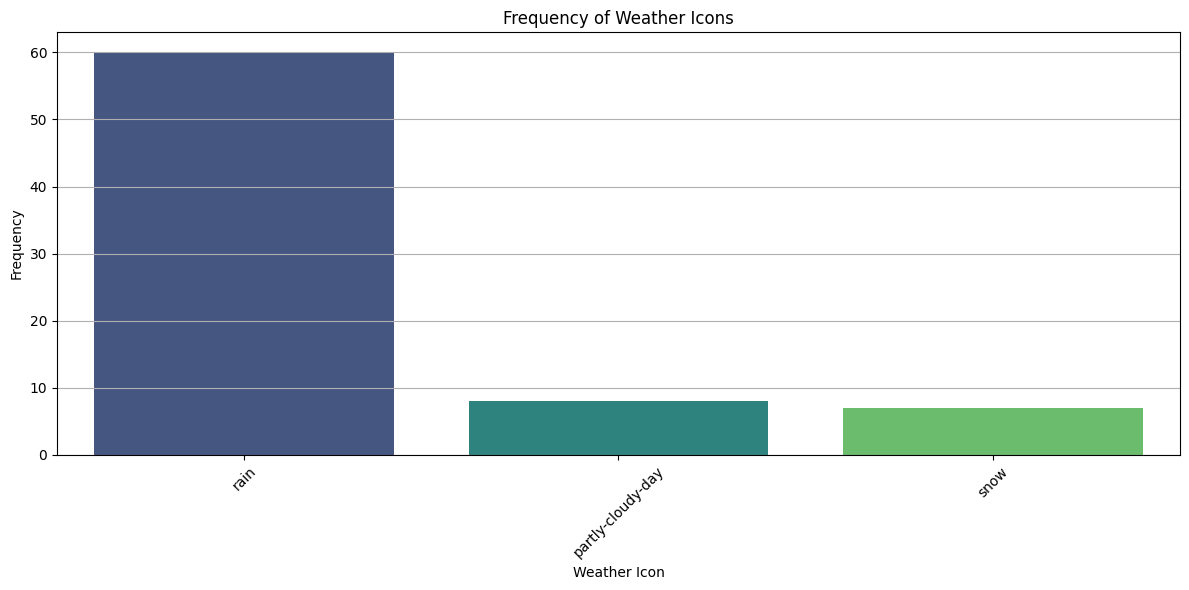

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather dataset
weather_data = pd.read_csv('cleanedweather.csv')

# Display the first few rows of the dataset
print("Weather Data:")
print(weather_data.head())

# Count the occurrences of each icon
icon_counts = weather_data['icon'].value_counts()

# Create a bar plot for the icon column
plt.figure(figsize=(12, 6))
sns.barplot(x=icon_counts.index, y=icon_counts.values, palette='viridis')
plt.title('Frequency of Weather Icons')
plt.xlabel('Weather Icon')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As we can see from the bar plot, the weather was mostly rainy for the past 6 months.


In [ ]:
# prompt: from the cleanedweather.csv dataset, I want to calculate the average temperature and standard deviation

import pandas as pd
# Load the weather dataset
weather_data = pd.read_csv('cleanedweather.csv')

# Calculate the average temperature
average_temperature = weather_data['temp'].mean()

# Calculate the standard deviation of temperature
std_dev_temperature = weather_data['temp'].std()

# Print the results
print(f"Average Temperature: {average_temperature:.2f} °C")
print(f"Standard Deviation of Temperature: {std_dev_temperature:.2f} °C")


Average Temperature: 7.41 °C
Standard Deviation of Temperature: 3.50 °C


In [ ]:
# prompt: and also average humidity level

import pandas as pd
# Load the weather dataset
weather_data = pd.read_csv('cleanedweather.csv')

# Calculate the average humidity
average_humidity = weather_data['humidity'].mean()

# Print the result
print(f"Average Humidity: {average_humidity:.2f} %")


Average Humidity: 81.31 %


In [ ]:
# prompt: average daily spending from cleanedakbank.csv

import pandas as pd

# Akbank verisini yükle
akbank_data = pd.read_csv('cleanedakbank.csv')

# Tarih sütununu kontrol et ve geçerli tarih formatına sahip olmayan satırları temizle
akbank_data = akbank_data[akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')]

# Tarih sütununu datetime formatına çevir
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')

# Harcamaları negatif tutar olarak filtrele
akbank_data['Günlük Harcamalar'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Tarih sütununu indeks olarak ayarla
akbank_data.set_index('Tarih', inplace=True)

# Günlük harcamaları toplamak için gruplama yap
daily_expenses = akbank_data.resample('D')['Günlük Harcamalar'].sum()

# Ortalama günlük harcamayı hesapla
average_daily_spending = daily_expenses.mean()

# Sonucu yazdır
print(f"daily average spending: {average_daily_spending:.2f} TL")


daily average spending: -1432.50 TL


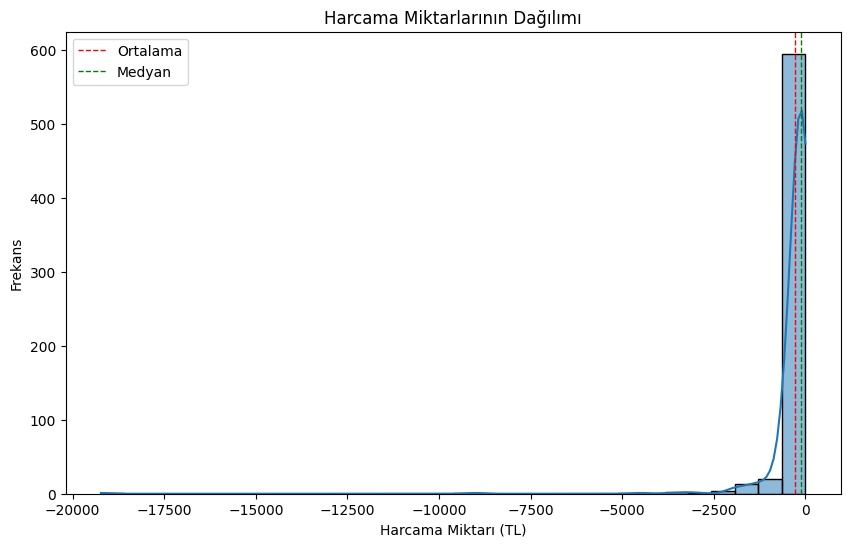

Basic Statistics:
count      638.000000
mean      -273.926850
std        923.889072
min     -19230.900000
25%       -280.000000
50%       -126.000000
75%        -20.000000
max          0.000000
Name: Harcama, dtype: float64


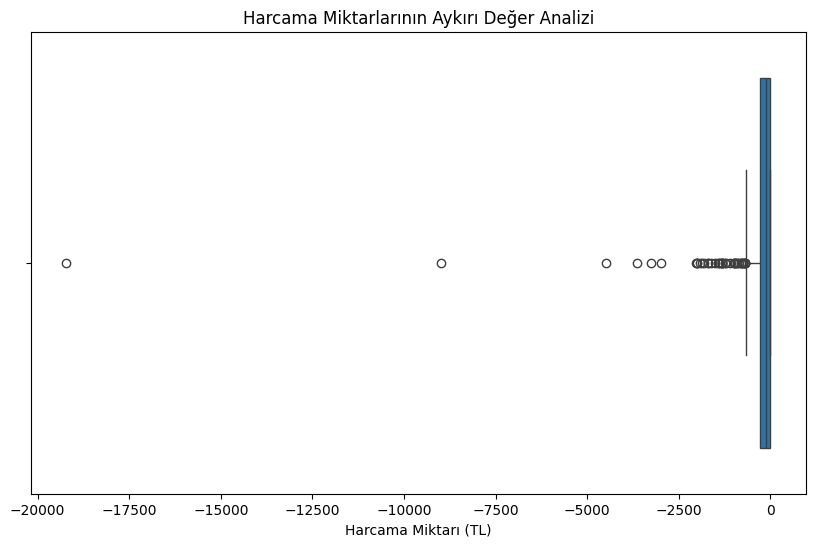

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Harcama verilerini yükleyin
akbank_data = pd.read_csv('cleanedakbank.csv')

# Harcama miktarlarını negatif olanları filtreleyin (harcama)
akbank_data['Harcama'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Harcama miktarlarının dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(akbank_data['Harcama'], bins=30, kde=True)
plt.title('Harcama Miktarlarının Dağılımı')
plt.xlabel('Harcama Miktarı (TL)')
plt.ylabel('Frekans')
plt.axvline(akbank_data['Harcama'].mean(), color='r', linestyle='dashed', linewidth=1, label='Ortalama')
plt.axvline(akbank_data['Harcama'].median(), color='g', linestyle='dashed', linewidth=1, label='Medyan')
plt.legend()
plt.show()

# Temel istatistikleri hesaplayın
print("Basic Statistics:")
print(akbank_data['Harcama'].describe())

# Aykırı değerleri belirlemek için boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=akbank_data['Harcama'])
plt.title('Harcama Miktarlarının Aykırı Değer Analizi')
plt.xlabel('Harcama Miktarı (TL)')
plt.show()

<ipython-input-39-b748d6cad270>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcomes['Kategori'] = outcomes['Açıklama'].apply(categorize_transaction)


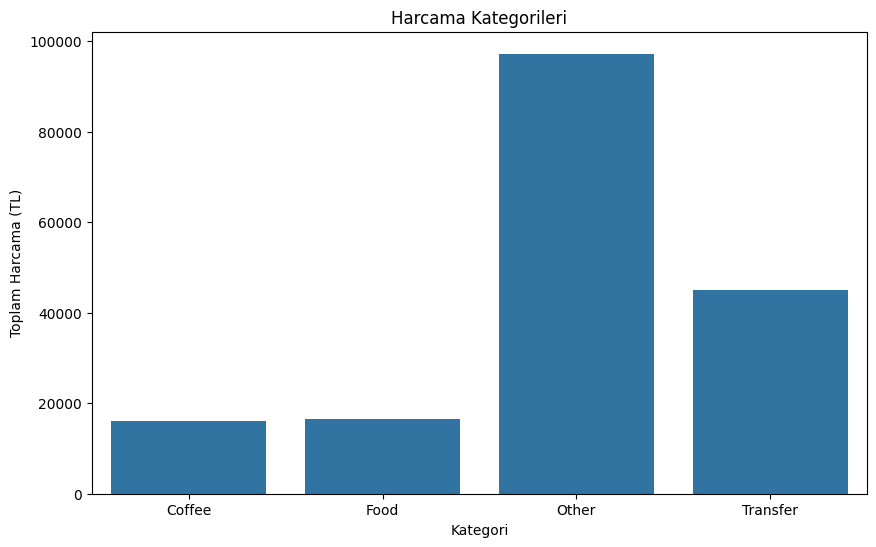

In [ ]:
# prompt: categorize the akbank data. ı want to see which fields am i spending the most. categories: transfer, food, coffee, other than, do a bar plot disregard incomes. only consider outcomes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Akbank verisini yükle
akbank_data = pd.read_csv('cleanedakbank.csv')

# Tarih sütununu datetime formatına çevir (önceki koddan alındı)
akbank_data = akbank_data[akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')]
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')

# Sadece harcamaları (negatif tutarlar) al
outcomes = akbank_data[akbank_data['Tutar'] < 0]

# Kategorileri tanımla
def categorize_transaction(description):
    description = str(description).lower()
    if 'finans' in description or 'akbank' in description or 'qnb' in description or 'kredi' in description:
        return 'Transfer'
    elif 'market' in description or 'paytr' in description or 'gıda' in description or 'kuruyemiş' in description or 'sok' in description:
        return 'Food'
    elif 'kahve' in description or 'coffy' in description or 'starbucks' in description:
        return 'Coffee'
    else:
        return 'Other'

outcomes['Kategori'] = outcomes['Açıklama'].apply(categorize_transaction)

# Kategorilere göre harcamaları topla
spending_by_category = outcomes.groupby('Kategori')['Tutar'].sum() * -1  # Negatifleri pozitife çevir

# Bar plot oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values)
plt.title('Harcama Kategorileri')
plt.xlabel('Kategori')
plt.ylabel('Toplam Harcama (TL)')
plt.show()


In [5]:
import pandas as pd

# Hava durumu verisini yükle
weather_data = pd.read_csv('cleanedweather.csv')

# Hava durumu verisinin ilk birkaç satırını görüntüle
print("Hava Durumu Verisi:")
print(weather_data.head())

# Eğer 'datetime' sütunu yoksa, tarih bilgisi yoksa, tarihleri oluşturmak için bir aralık belirleyin
# Aşağıdaki satırı, tarih bilgisi varsa kullanın
# weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Eğer tarih bilgisi yoksa, tarihleri oluşturmak için bir aralık belirleyin
# Örneğin, 2025-01-01'den itibaren günler oluşturulabilir
weather_data['datetime'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')

# 'datetime' sütununu datetime formatına çevir
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# 'datetime' sütununu indeks olarak ayarla
weather_data = weather_data.set_index('datetime')


print(weather_data.head())

Hava Durumu Verisi:
   tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  dew  \
0     14.4     10.7  12.2          14.4          10.7       12.2  9.8   
1     12.8      9.5  11.0          12.8           5.8       10.0  9.4   
2      8.8      4.5   6.5           4.9           1.0        2.8  4.8   
3      8.5      5.2   6.9           4.8           2.3        3.3  5.0   
4      8.1      6.9   7.5           4.7           3.1        3.9  5.5   

   humidity  precipcover preciptype  snow  snowdepth  windgust  windspeed  \
0      85.6         8.33       rain   0.0        0.0      28.1       19.8   
1      89.9        12.50       rain   0.0        0.0      57.6       33.7   
2      88.9        16.67       rain   0.0        0.0      59.4       35.5   
3      87.6        16.67       rain   0.0        0.0      54.0       32.0   
4      87.0        16.67       rain   0.0        0.0      51.5       30.1   

   winddir  sealevelpressure  visibility  icon  
0     31.2            1009.8 

DATE-TIME error was always occuring. so another cleaning process was made.

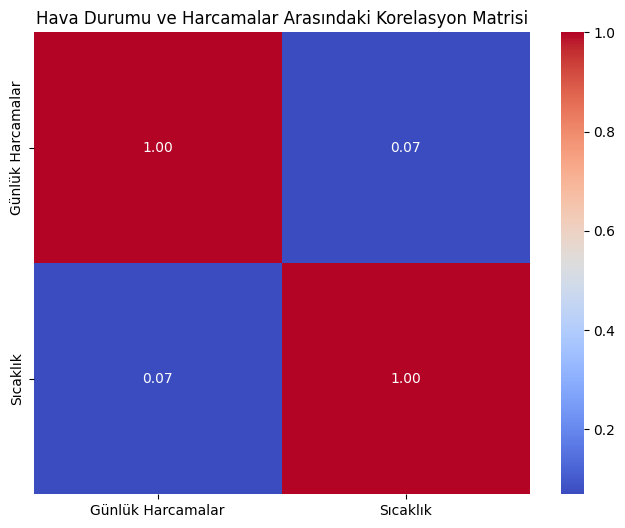

Günlük Harcamalar ile Sıcaklık Arasındaki R Değeri: 0.07


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hava durumu verisini yükle
weather_data = pd.read_csv('cleanedweather.csv')

# Tarih sütununu datetime formatına çevir ve indekse ayarla
weather_data['datetime'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data.set_index('datetime', inplace=True)

# Akbank verisini yükle
akbank_data = pd.read_csv('cleanedakbank.csv')

# Tarih sütununu datetime formatına çevir ve indekse ayarla
akbank_data = akbank_data[akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')]
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')
akbank_data.set_index('Tarih', inplace=True)

# Harcamaları negatif tutar olarak filtrele
akbank_data['Günlük Harcamalar'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Günlük harcamaları toplamak için gruplama yap
daily_expenses = akbank_data.resample('D')['Günlük Harcamalar'].sum()

# Hava durumu verisi ile harcama verisini birleştir
combined_data = pd.concat([daily_expenses, weather_data['temp']], axis=1)
combined_data.columns = ['Günlük Harcamalar', 'Sıcaklık']

# Korelasyon matrisini hesapla
correlation_matrix = combined_data.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Hava Durumu ve Harcamalar Arasındaki Korelasyon Matrisi')
plt.show()

# R değerini bul
r_value = correlation_matrix.loc['Günlük Harcamalar', 'Sıcaklık']
print(f'Günlük Harcamalar ile Sıcaklık Arasındaki R Değeri: {r_value:.2f}')

I thought that there was a correlation between the temperature and my daily expenses. However, the correlation coefficient is 0.07 which means the correlation coefficient is not strong to say that there is a correlation between those two parameters.


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the weather data
weather_data = pd.read_csv('cleanedweather.csv')

# Create a datetime index assuming daily data starting from a specific date
weather_data['datetime'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')
weather_data.set_index('datetime', inplace=True)

# Load the expense data
akbank_data = pd.read_csv('cleanedakbank.csv')

# Check the unique values in the 'Tarih' column to identify non-datetime entries


# Remove any non-datetime entries from the 'Tarih' column
# This will keep only valid datetime strings
akbank_data = akbank_data[akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')]

# Convert the 'Tarih' column to datetime format and set it as the index
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')
akbank_data.set_index('Tarih', inplace=True)

# Filter expenses to keep only negative amounts (expenses)
akbank_data['Daily_Expenses'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Resample to get daily expenses
daily_expenses = akbank_data.resample('D')['Daily_Expenses'].sum()

# Combine the weather data with daily expenses
combined_data = pd.concat([daily_expenses, weather_data['temp']], axis=1)
combined_data.columns = ['Daily_Expenses', 'Temperature']

# Drop rows with NaN values to ensure valid correlation calculation
combined_data.dropna(inplace=True)

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(combined_data['Temperature'], combined_data['Daily_Expenses'])

# Print the results
print("Correlation Coefficient (r):", correlation)
print("P-Value:", p_value)

# Evaluate the significance of the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0. There is a significant relationship between temperature and daily expenses.")
else:
    print("Fail to reject H0. There is no significant relationship between temperature and daily expenses.")

Correlation Coefficient (r): 0.06947249705142057
P-Value: 0.5536761711070571
Fail to reject H0. There is no significant relationship between temperature and daily expenses.


I did hypotesis testing after the correlation analysis.
H0: There is a significant correlation between the temperature and daily expenses.
H1: There is no significant relationship between the temperature and daily expenses.
My decision is shown above. I have rejected H0 and concluded that there is no significant correlation between the temperature and daily expenses.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the weather data
weather_data = pd.read_csv('cleanedweather.csv')

# Create a datetime index assuming daily data starting from a specific date
weather_data['datetime'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')
weather_data.set_index('datetime', inplace=True)

# Load the expense data
akbank_data = pd.read_csv('cleanedakbank.csv')

# Check the unique values in the 'Tarih' column to identify non-datetime entrie

# Remove any non-datetime entries from the 'Tarih' column
# This will keep only valid datetime strings
valid_dates = akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')
akbank_data = akbank_data[valid_dates]

# Convert the 'Tarih' column to datetime format and set it as the index
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')
akbank_data.set_index('Tarih', inplace=True)

# Filter expenses to keep only negative amounts (expenses)
akbank_data['Daily_Expenses'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)

# Resample to get daily expenses
daily_expenses = akbank_data.resample('D')['Daily_Expenses'].sum()

# Combine the weather data with daily expenses
combined_data = pd.concat([daily_expenses, weather_data['preciptype']], axis=1)
combined_data.columns = ['Daily_Expenses', 'PrecipType']

# Classify days into rainy and non-rainy
combined_data['Rainy'] = combined_data['PrecipType'].apply(lambda x: 1 if 'rain' in str(x) else 0)

# Separate daily expenses into two groups: rainy and non-rainy
rainy_expenses = combined_data[combined_data['Rainy'] == 1]['Daily_Expenses']
non_rainy_expenses = combined_data[combined_data['Rainy'] == 0]['Daily_Expenses']

# Perform the t-test
t_stat, p_value = ttest_ind(rainy_expenses, non_rainy_expenses, equal_var=False)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Evaluate the significance of the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0. There is a significant difference in daily expenses between rainy and non-rainy days.")
else:
    print("Fail to reject H0. There is no significant difference in daily expenses between rainy and non-rainy days.")

T-Statistic: 0.8863654962901212
P-Value: 0.3794402806384898
Fail to reject H0. There is no significant difference in daily expenses between rainy and non-rainy days.


<ipython-input-66-cb70ebcc2d9c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')
<ipython-input-66-cb70ebcc2d9c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akbank_data['Daily_Expenses'] = akbank_data['Tutar'].where(akbank_data['Tutar'] < 0, 0)


After the correlation analysis, I wondered whether there is a difference on my spendings on rainy and non-rainy days.
Therefore, I conducted a hypotesis test.
H0: There is no significant difference in daily expenses between rainy and non-rainy days.
H1:There is a significant difference in daily expenses between rainy and non-rainy days.
p value and t test statistic values are shown above.
We rejected H0.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the expense data
akbank_data = pd.read_csv('cleanedakbank.csv')

# Check the unique values in the 'Tarih' column to identify non-datetime entries


# Remove any non-datetime entries from the 'Tarih' column
# This will keep only valid datetime strings
valid_dates = akbank_data['Tarih'].str.match(r'^\d{4}-\d{2}-\d{2}-\d{2}\.\d{2}\.\d{2}\.\d{6}$')
akbank_data = akbank_data[valid_dates]

# Convert the 'Tarih' column to datetime format and set it as the index
akbank_data['Tarih'] = pd.to_datetime(akbank_data['Tarih'], format='%Y-%m-%d-%H.%M.%S.%f')
akbank_data.set_index('Tarih', inplace=True)

# Count the number of transactions per day
akbank_data['Transaction_Count'] = 1  # Each row represents a transaction
daily_transactions = akbank_data.resample('D')['Transaction_Count'].sum()

# Load the weather data
weather_data = pd.read_csv('cleanedweather.csv')

# Create a datetime index assuming daily data starting from a specific date
weather_data['datetime'] = pd.date_range(start='2025-01-01', periods=len(weather_data), freq='D')
weather_data.set_index('datetime', inplace=True)

# Combine the weather data with daily transaction counts
combined_data = pd.concat([daily_transactions, weather_data['preciptype']], axis=1)
combined_data.columns = ['Transaction_Count', 'PrecipType']

# Classify days into rainy and non-rainy
combined_data['Rainy'] = combined_data['PrecipType'].apply(lambda x: 1 if 'rain' in str(x) else 0)

# Create a contingency table
contingency_table = pd.crosstab(combined_data['Rainy'], combined_data['Transaction_Count'] > 0)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# Evaluate the significance of the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0. There is a significant association between rainy days and transaction frequency.")
else:
    print("Fail to reject H0. There is no significant association between rainy days and transaction frequency.")

Chi-Square Statistic: 0.02630553517567457
P-Value: 0.8711563822807711
Fail to reject H0. There is no significant association between rainy days and transaction frequency.


The test above is like below.
H0: There is no significant association between rainy days and transaction frequency.
H1: There is a significant association between rainy days and transaction frequency.
The results of the test is written above.


**Final Part Starts Here**

From now on the first thing I will do is to merge the two datasets within each other so conducting a model will be a lot easier.

In [7]:
import pandas as pd

# 1. Read original raw datasets
df_expense = pd.read_csv("Akbank Data.csv", sep=';', skiprows=6)
df_weather = pd.read_csv("istanbulweather.csv")

# 2. Clean expense data
df_expense.columns = [col.strip().strip(';') for col in df_expense.columns]
df_expense.dropna(how='all', inplace=True)

for col in ['Tutar', 'Bakiye']:
    df_expense[col] = df_expense[col].str.replace('.', '', regex=False)
    df_expense[col] = df_expense[col].str.replace(',', '.', regex=False)
    df_expense[col] = df_expense[col].str.replace(' TL', '', regex=False)
    df_expense[col] = pd.to_numeric(df_expense[col], errors='coerce')

df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_expense = df_expense.dropna(subset=['Tarih']).copy()
df_expense['date'] = df_expense['Tarih'].dt.date

# 3. Aggregate daily total expense
df_daily_expense = df_expense.groupby('date')['Tutar'].sum().reset_index()
df_daily_expense.rename(columns={'Tutar': 'total_expense'}, inplace=True)

# 4. Clean weather data
columns_to_drop = [
    'name', 'description', 'conditions', 'stations', 'sunrise', 'sunset', 'precip',
    'precipprob', 'moonphase', 'severerisk', 'uvindex', 'solarenergy', 'solarradiation', 'cloudcover'
]
df_weather.drop(columns=columns_to_drop, errors='ignore', inplace=True)

df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], errors='coerce')
df_weather = df_weather.dropna(subset=['datetime']).copy()
df_weather['date'] = df_weather['datetime'].dt.date

# 5. Merge data on 'date'
df_merged = pd.merge(df_daily_expense, df_weather, on='date', how='inner')

# 6. Display merge status
print("Daily expense records:", len(df_daily_expense))
print("Weather records:", len(df_weather))
print("Merged records:", len(df_merged))
print("\nFirst 5 rows of merged data:")
print(df_merged.head())


Daily expense records: 116
Weather records: 152
Merged records: 116

First 5 rows of merged data:
         date  total_expense   datetime  tempmax  tempmin  temp  feelslikemax  \
0  2024-12-25        -504.00 2024-12-25     14.4     10.7  12.2          14.4   
1  2024-12-26      -22051.90 2024-12-26     12.8      9.5  11.0          12.8   
2  2024-12-27        -998.50 2024-12-27      8.8      4.5   6.5           4.9   
3  2024-12-28       -1652.22 2024-12-28      8.5      5.2   6.9           4.8   
4  2024-12-29         -40.00 2024-12-29      8.1      6.9   7.5           4.7   

   feelslikemin  feelslike  dew  ...  precipcover  preciptype snow  snowdepth  \
0          10.7       12.2  9.8  ...         8.33        rain  0.0        0.0   
1           5.8       10.0  9.4  ...        12.50        rain  0.0        0.0   
2           1.0        2.8  4.8  ...        16.67        rain  0.0        0.0   
3           2.3        3.3  5.0  ...        16.67        rain  0.0        0.0   
4         

In [11]:
# Feature engineering on expense data
expense_features = df_expense.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min')
).reset_index()


In [12]:
df_weather_features = df_weather[['date', 'preciptype']].dropna()

df_final = pd.merge(expense_features, df_weather_features, on='date', how='inner')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df_final.drop(columns=['date', 'preciptype'])
y = df_final['preciptype']

# (Opsiyonel) class simplification
y = y.apply(lambda x: x if x == "rain" else "other")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8
              precision    recall  f1-score   support

       other       0.00      0.00      0.00         1
        rain       0.92      0.86      0.89        14

    accuracy                           0.80        15
   macro avg       0.46      0.43      0.44        15
weighted avg       0.86      0.80      0.83        15



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime
df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_harcama = df_expense.dropna(subset=['Tarih']).copy()

# 2. Extract time-based features
df_harcama['hour'] = df_harcama['Tarih'].dt.hour
df_harcama['date'] = df_harcama['Tarih'].dt.date

# 3. Expense features
expense_features = df_harcama.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min')
).reset_index()

# 4. Time features
hour_features = df_harcama.groupby('date').agg(
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean')
).reset_index()

# 5. Merge features
df_features = pd.merge(expense_features, hour_features, on='date', how='inner')

# 6. Merge with target (humidity)
df_reg = pd.merge(df_features, df_weather[['date', 'humidity']], on='date', how='inner').dropna()

# 7. Features and target
X = df_reg.drop(columns=['date', 'humidity'])
y = df_reg['humidity']

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train regression model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# 11. Predict and evaluate
y_pred = reg.predict(X_test_scaled)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 7.621458333333339
R² Score: 0.08010181567351005


Even though I tried so hard, however the model is extremely weak. So, I will try to predict directly the temperature.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime
df_harcama['Tarih'] = pd.to_datetime(df_harcama['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_harcama = df_harcama.dropna(subset=['Tarih']).copy()

# 2. Extract time-based features
df_harcama['hour'] = df_harcama['Tarih'].dt.hour
df_harcama['date'] = df_harcama['Tarih'].dt.date

# 3. Expense features
expense_features = df_harcama.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min')
).reset_index()

# 4. Time features
hour_features = df_harcama.groupby('date').agg(
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean')
).reset_index()

# 5. Merge all features
df_features = pd.merge(expense_features, hour_features, on='date', how='inner')

# 6. Merge with target: temperature
df_reg = pd.merge(df_features, df_weather[['date', 'temp']], on='date', how='inner').dropna()

# 7. Features and target
X = df_reg.drop(columns=['date', 'temp'])
y = df_reg['temp']

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_scaled, y_train)

# 11. Predict and evaluate
y_pred = reg.predict(X_test_scaled)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 3.470499999999999
R² Score: -0.48607364217600946


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime and extract time features
df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_expense = df_expense.dropna(subset=['Tarih']).copy()
df_expense['hour'] = df_expense['Tarih'].dt.hour
df_expense['date'] = df_expense['Tarih'].dt.date
df_expense['weekday'] = df_expense['Tarih'].dt.weekday
df_expense['month'] = df_expense['Tarih'].dt.month

# 2. Expense features
expense_features = df_expense.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min'),
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean'),
    weekday=('weekday', 'first'),
    month=('month', 'first')
).reset_index()

# 3. Merge with weather data (target: tempmax)
df_reg = pd.merge(expense_features, df_weather[['date', 'tempmax']], on='date', how='inner').dropna()

# 4. Features and target
X = df_reg.drop(columns=['date', 'tempmax'])
y = df_reg['tempmax']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train model
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
y_pred = reg.predict(X_test_scaled)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 4.444418413826625
R² Score: -0.39473926081077915


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime and extract time features
df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_expense = df_expense.dropna(subset=['Tarih']).copy()
df_expense['hour'] = df_expense['Tarih'].dt.hour
df_expense['date'] = df_expense['Tarih'].dt.date
df_expense['weekday'] = df_expense['Tarih'].dt.weekday
df_expense['month'] = df_expense['Tarih'].dt.month

# 2. Aggregate expense & time features by day
expense_features = df_expense.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min'),
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean'),
    weekday=('weekday', 'first'),
    month=('month', 'first')
).reset_index()

# 3. Merge with weather data (target: tempmax)
df_reg = pd.merge(expense_features, df_weather[['date', 'tempmax']], on='date', how='inner').dropna()

# 4. Features and target
X = df_reg.drop(columns=['date', 'tempmax'])
y = df_reg['tempmax']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train model
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
y_pred = reg.predict(X_test_scaled)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 4.444418413826625
R² Score: -0.39473926081077915


Datasets are not strong enough within each other. Even gradient boosting regressor is not enough to find a relationship between the datasets. kNN model maybe will.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime and extract time features
df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_expense = df_expense.dropna(subset=['Tarih']).copy()
df_expense['hour'] = df_expense['Tarih'].dt.hour
df_expense['date'] = df_expense['Tarih'].dt.date
df_expense['weekday'] = df_expense['Tarih'].dt.weekday
df_expense['month'] = df_expense['Tarih'].dt.month

# 2. Aggregate daily expense and time features
expense_features = df_expense.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min'),
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean'),
    weekday=('weekday', 'first'),
    month=('month', 'first')
).reset_index()

# 3. Merge with weather (target: tempmax)
df_reg = pd.merge(expense_features, df_weather[['date', 'tempmax']], on='date', how='inner').dropna()

# 4. Features and target
X = df_reg.drop(columns=['date', 'tempmax'])
y = df_reg['tempmax']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)  # k=3 örnek olarak
knn.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 3.956944444444444
R² Score: -0.2722060743651149


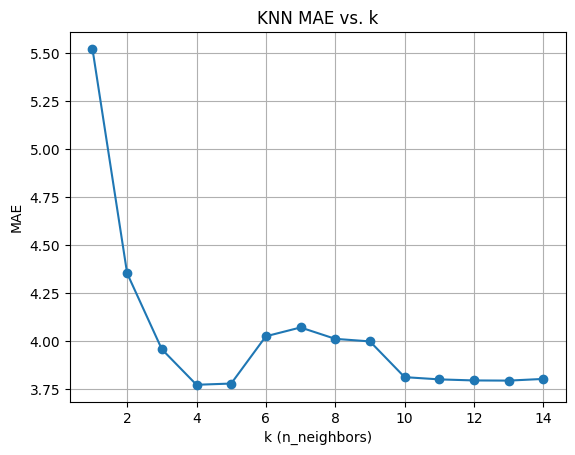

14


In [22]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

errors = []
neighbors_range = range(1, 15)

for k in neighbors_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred_k)
    errors.append(mae)

plt.plot(neighbors_range, errors, marker='o')
plt.xlabel('k (n_neighbors)')
plt.ylabel('MAE')
plt.title('KNN MAE vs. k')
plt.grid()
plt.show()
print(k)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Parse datetime and extract time features
df_expense['Tarih'] = pd.to_datetime(df_expense['Tarih'], format="%Y-%m-%d-%H.%M.%S.%f", errors='coerce')
df_expense = df_expense.dropna(subset=['Tarih']).copy()
df_expense['hour'] = df_expense['Tarih'].dt.hour
df_expense['date'] = df_expense['Tarih'].dt.date
df_expense['weekday'] = df_expense['Tarih'].dt.weekday
df_expense['month'] = df_expense['Tarih'].dt.month

# 2. Aggregate daily expense and time features
expense_features = df_expense.groupby('date').agg(
    total_expense=('Tutar', 'sum'),
    transaction_count=('Tutar', 'count'),
    avg_transaction=('Tutar', 'mean'),
    max_transaction=('Tutar', 'max'),
    min_transaction=('Tutar', 'min'),
    earliest_hour=('hour', 'min'),
    latest_hour=('hour', 'max'),
    avg_hour=('hour', 'mean'),
    weekday=('weekday', 'first'),
    month=('month', 'first')
).reset_index()

# 3. Merge with weather (target: tempmax)
df_reg = pd.merge(expense_features, df_weather[['date', 'tempmax']], on='date', how='inner').dropna()

# 4. Features and target
X = df_reg.drop(columns=['date', 'tempmax'])
y = df_reg['tempmax']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=14)  # k=3 örnek olarak
knn.fit(X_train_scaled, y_train)

# 8. Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 3.802380952380952
R² Score: -0.11417903117645078
